In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
def seqSearch(name, popNames):
    for i in range(0,len(popNames)):
        if name == popNames[i]:
            return i
    return -1
arrests = pd.read_csv('arrests.csv')
pop = pd.read_csv('total-population.csv')[['Neighborhood','Estimate; Total']]#.groupby('Neighborhood').max()
popNums=pop['Estimate; Total'].to_list()
popNames=pop['Neighborhood'].to_list()
#print(popNums)
arrests=arrests.groupby('INCIDENTNEIGHBORHOOD').size()
arrestsdict=arrests.to_dict()
arrNums = list(arrestsdict.values())
arrNames = list(arrestsdict.keys())
perCapita=[]
perNames=[]
#print(arrNames)
#population adjusting
count = 0
for i in range(0,len(popNames)):
    index = seqSearch(arrNames[i], popNames)
    if index != -1:
        #print("Neighborhood: " + arrNames[i]+ " arrests: " + str(arrNums[i]) + " pop: " + str(popNums[index]))
        perCapita.append(arrNums[i]/popNums[index])
        perNames.append(arrNames[i])
        perCapita[count]*=1000
        perCapita[count] = round(perCapita[count], 3)
        count+=1
#print(perCapita)
perCapDict={}
for i in range(0, len(perCapita)):
    perCapDict[perNames[i]]=perCapita[i]
#print(perCapDict)
perCapDict=OrderedDict(sorted(perCapDict.items(), key=lambda x: x[1]))
arrestFrame = pd.DataFrame(list(perCapDict.items()),columns = ['Neighborhood','Arrests Per 1000 People'])
perCapNames=list(perCapDict.keys())
safetyScoreDict={}
for i in range(0, len(perCapita)):
    safetyScoreDict[perCapNames[i]]=len(perCapita)-i
#print(perCapDict)
#print(arrNums)
print(arrestFrame)
print(safetyScoreDict)

                 Neighborhood  Arrests Per 1000 People
0           Central Northside                    7.953
1         Squirrel Hill North                   17.202
2               Regent Square                   22.265
3              Swisshelm Park                   22.305
4               New Homestead                   27.749
..                        ...                      ...
78  Central Business District                  705.911
79             East Allegheny                  750.835
80                North Shore                 2721.951
81                South Shore                17333.333
82                    Chateau               108000.000

[83 rows x 2 columns]
{'Central Northside': 83, 'Squirrel Hill North': 82, 'Regent Square': 81, 'Swisshelm Park': 80, 'New Homestead': 79, 'North Oakland': 78, 'Stanton Heights': 77, 'Squirrel Hill South': 76, 'Lincoln Place': 75, 'Morningside': 74, 'Point Breeze': 73, 'Greenfield': 72, 'Summer Hill': 71, 'Chartiers City': 70, 'Shadyside

76

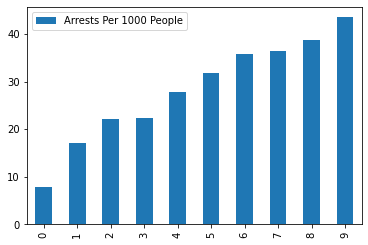

In [17]:
arrestFrame.head(10).plot.bar()
seqSearch(arrNames[i], popNames)

In [43]:
income = pd.read_csv('aggregate-household-income.csv')#[['Neighborhood','Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars']]
incomeNumsString=income['Estimate'].to_list()
incomeNums=[]
for num in incomeNumsString:
    incomeNums.append(float(num))
incomeNames=income['Neighborhood'].to_list()
perCapita=[]
perNames=[]
income.sample(10)
#population adjusting
count = 0
for i in range(0,len(popNames)):
    index = seqSearch(incomeNames[i], popNames)
    if index != -1:
        #print("Neighborhood: " + arrNames[i]+ " arrests: " + str(arrNums[i]) + " pop: " + str(popNums[index]))
        perCapita.append(incomeNums[i]/popNums[index])
        perNames.append(incomeNames[i])
        count+=1
#print(perCapita)
perCapDict={}
for i in range(0, len(perCapita)):
    perCapDict[perNames[i]]=perCapita[i]
#print(perCapDict)
perCapDict=OrderedDict(sorted(perCapDict.items(), key=lambda x: x[1]))
rentFrame = pd.DataFrame(list(perCapDict.items()),columns = ['Neighborhood','Average Household Income'])
perCapNames=list(perCapDict.keys())
rentScoreDict={}
for i in range(0, len(perCapita)):
    rentScoreDict[perCapNames[i]]=len(perCapita)-i
print(rentScoreDict)

{'Bluff': 91, 'Northview Heights': 90, 'Glen Hazel': 89, 'Terrace Village': 88, 'Bedford Dwellings': 87, 'Arlington Heights': 86, 'West Oakland': 85, 'Central Oakland': 84, 'Larimer': 83, 'Marshall-Shadeland': 82, 'Homewood North': 81, 'North Oakland': 80, 'Homewood South': 79, 'Homewood West': 78, 'California-Kirkbride': 77, 'Knoxville': 76, 'St. Clair': 75, 'East Hills': 74, 'Allentown': 73, 'Crawford-Roberts': 72, 'West End': 71, 'Middle Hill': 70, 'Hays': 69, 'Perry South': 68, 'South Oakland': 67, 'Beltzhoover': 66, 'Garfield': 65, 'Elliott': 64, 'Esplen': 63, 'Sheraden': 62, 'Hazelwood': 61, 'Mount Oliver Borough': 60, 'Lincoln-Lemington-Belmar': 59, 'Spring Garden': 58, 'Spring Hill-City View': 57, 'Arlington': 56, 'Fineview': 55, 'East Liberty': 54, 'Upper Hill': 53, 'Carrick': 52, 'Crafton Heights': 51, 'Windgap': 50, 'Mt. Oliver': 49, 'Oakwood': 48, 'Upper Lawrenceville': 47, 'Beechview': 46, 'Bon Air': 45, 'Lincoln Place': 44, 'Overbrook': 43, 'East Carnegie': 42, 'Chartiers